In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the consolidated number of employees
empl = pd.read_csv('data/toyota_number_of_employees.csv', usecols = [0, 2], index_col = 0)

empl.head()

,Consolidated number of employees
Year,
2000,210709
2001,215648
2002,246702
2003,264096
2004,264410


In [3]:
# From the production data we only need the year and the worldwide production numbers
prod = pd.read_csv('data/toyota_production_by_country.csv', usecols = [0, 32], index_col = 0)
empl_prod = empl.assign(worldwide_production = prod)

empl_prod.head()

,Consolidated number of employees,worldwide_production
Year,,
2000,210709,5180651
2001,215648,5134629
2002,246702,5640389
2003,264096,6078282
2004,264410,6723674


In [4]:
# Read total assets
assets = pd.read_csv('data/toyota_total_assets.csv', index_col = 0)
empl_prod_assets = empl_prod.assign(total_assets = assets)

empl_prod_assets

,Consolidated number of employees,worldwide_production,total_assets
Year,,,
2000,210709,5180651,16469.054
2001,215648,5134629,17519.427
2002,246702,5640389,19305.730
2003,264096,6078282,20152.974
2004,264410,6723674,22040.228
2005,265753,7360885,24335.011
2006,285977,8093163,28731.595
2007,299394,8534690,32574.779
2008,316121,8210818,32458.320


In [5]:
# The production function will be estimated using the Cobb-Douglas production function
# The Cobb-Douglas production function is not linear, so it needs to be converted to linear form before fitting
# We convert it to linear form by taking the natural logarithm of it

empl_prod_assets['logL'] = np.log(empl_prod_assets['Consolidated number of employees'])
empl_prod_assets['logK'] = np.log(empl_prod_assets['total_assets'])
empl_prod_assets['logQ'] = np.log(empl_prod_assets['worldwide_production'])
empl_prod_assets['logQ_K'] = np.log(empl_prod_assets['worldwide_production']/empl_prod_assets['total_assets'])
empl_prod_assets['logL_K'] = np.log(empl_prod_assets['Consolidated number of employees']/empl_prod_assets['total_assets'])

empl_prod_assets.head()

,Consolidated number of employees,worldwide_production,total_assets,logL,logK,logQ,logQ_K,logL_K
Year,,,,,,,,
2000,210709,5180651,16469.054,12.258233,9.709238,15.460441,5.751203,2.548995
2001,215648,5134629,17519.427,12.281403,9.771066,15.451518,5.680452,2.510337
2002,246702,5640389,19305.730,12.415936,9.868157,15.545464,5.677306,2.547779
2003,264096,6078282,20152.974,12.484068,9.911107,15.620233,5.709125,2.572961
2004,264410,6723674,22040.228,12.485256,10.000625,15.721145,5.720521,2.484632


In [6]:
import statsmodels.formula.api as smf

# Ordinary least squares for simple linear regression - allowing variable returns
model = smf.ols(formula = 'logQ ~ logL + logK', data = empl_prod_assets).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logQ   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     41.57
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           2.84e-07
Time:                        00:15:15   Log-Likelihood:                 22.494
No. Observations:                  20   AIC:                            -38.99
Df Residuals:                      17   BIC:                            -36.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1955      3.084      2.657      0.017       1.688      14.703
logL           0.3199      0.376      0.851      0.406      -0.473       1.113
logK           0.3485      0.174      2.005      0.061      -0.018       0.715
==============================================================================
Omnibus:                        0.548   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.587
Skew:                           0.007   Prob(JB):                        0.746
Kurtosis:                       2.161   Cond. No.                     2.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Ordinary least squares for simple linear regression - assuming constant returns
model_constant_growth = smf.ols(formula = 'logQ_K ~ logL_K', data = empl_prod_assets).fit()

model_constant_growth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 logQ_K   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     82.19
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           3.95e-08
Time:                        00:15:15   Log-Likelihood:                 21.210
No. Observations:                  20   AIC:                            -38.42
Df Residuals:                      18   BIC:                            -36.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5003      0.221     15.828      0.000       3.036       3.965
logL_K         0.8754      0.097      9.066      0.000       0.673       1.078
==============================================================================
Omnibus:                        1.723   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                0.768
Skew:                          -0.473   Prob(JB):                        0.681
Kurtosis:                       3.170   Cond. No.                         30.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Get the predictions and record these predictions to the data frame
empl_prod_assets['pred_var_ret'] = model.predict()
empl_prod_assets['pred_con_ret'] = model_constant_growth.predict()

empl_prod_assets.head()

,Consolidated number of employees,worldwide_production,total_assets,logL,logK,logQ,logQ_K,logL_K,pred_var_ret,pred_con_ret
Year,,,,,,,,,,
2000,210709,5180651,16469.054,12.258233,9.709238,15.460441,5.751203,2.548995,15.500708,5.731812
2001,215648,5134629,17519.427,12.281403,9.771066,15.451518,5.680452,2.510337,15.529667,5.697969
2002,246702,5640389,19305.730,12.415936,9.868157,15.545464,5.677306,2.547779,15.606542,5.730748
2003,264096,6078282,20152.974,12.484068,9.911107,15.620233,5.709125,2.572961,15.643306,5.752793
2004,264410,6723674,22040.228,12.485256,10.000625,15.721145,5.720521,2.484632,15.674882,5.675466


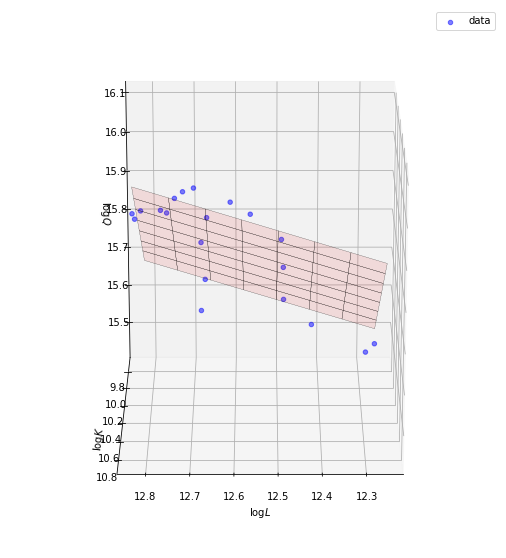

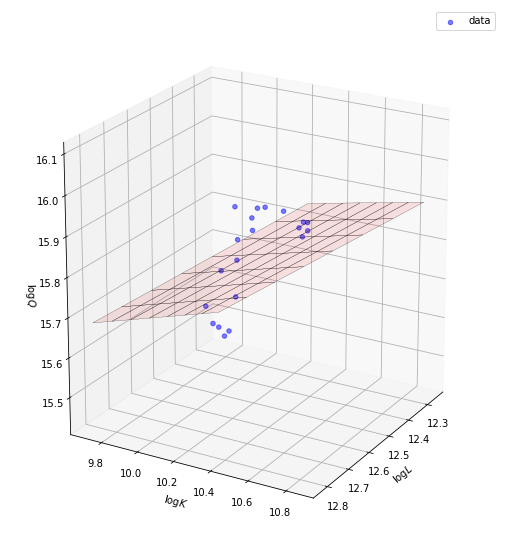

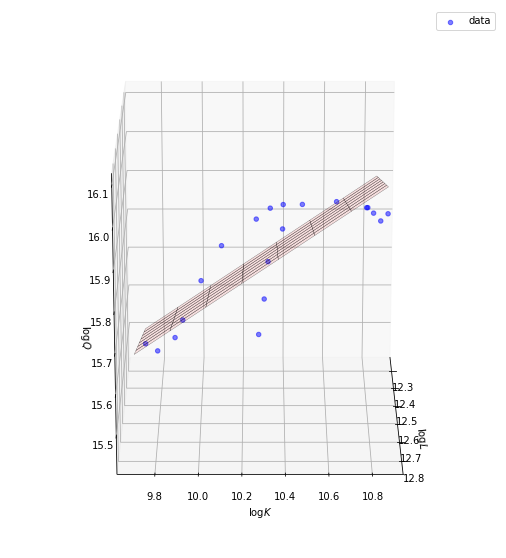

In [13]:
# Plot data and model

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_data_model(pos, size, elev, azim):
    x_surf = np.linspace(empl_prod_assets.logL.min(), empl_prod_assets.logL.max(), 8)
    y_surf = np.linspace(empl_prod_assets.logK.min(), empl_prod_assets.logK.max(), 8)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)

    onlyX = pd.DataFrame({'logL': x_surf.ravel(), 'logK': y_surf.ravel()})
    fittedY = model.predict(exog = onlyX)

    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(pos, projection = '3d')
    ax.scatter(empl_prod_assets['logL'],
               empl_prod_assets['logK'],
               empl_prod_assets['logQ'],
               c = 'blue', marker = 'o', alpha = 0.5, label = 'data')
    ax.plot_surface(x_surf,
                    y_surf,
                    fittedY.values.reshape(x_surf.shape),
                    color = 'Red', edgecolor = 'black', alpha = 0.1, linewidth = 0.2)
    ax.set_xlabel(r'$\log{L}$')
    ax.set_ylabel(r'$\log{K}$')
    ax.set_zlabel(r'$\log{Q}$')
    ax.legend()
    ax.view_init(elev, azim)
    return ax

plot_data_model(131, (30, 10), 20, 90)
plot_data_model(132, (30, 10), 20, 30)
plot_data_model(133, (30, 10), 20, 0)

plt.show()

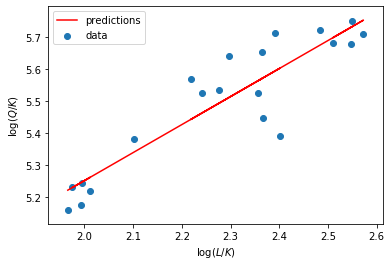

In [10]:
fig, ax = plt.subplots()
ax.scatter(empl_prod_assets['logL_K'], empl_prod_assets['logQ_K'], label = "data")
ax.plot(empl_prod_assets['logL_K'], empl_prod_assets['pred_con_ret'], color = 'red', label = "predictions")
ax.set_xlabel(r'$\log{(L/K)}$')
ax.set_ylabel(r'$\log{(Q/K)}$')
ax.legend()
plt.show()

In [11]:
# Values of regression coefficients - variable returns
model.params

Intercept    8.195524
logL         0.319914
logK         0.348494
dtype: float64

We therefore get

$$\ln{Q} = 8.195524 + 0.319914\ln{L} + 0.348494\ln{K}$$

$$Q = e^{8.195524}L^{0.319914}K^{0.348494}$$

$$Q = 3625L^{0.319914}K^{0.348494}$$

In [12]:
# Values of regression coefficients - constant returns
model_constant_growth.params

Intercept    3.500330
logL_K       0.875436
dtype: float64